In [1]:
import re
import json
import datetime
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
import sys
import os

sys.path.insert(1, '../src/')

from partyset import PartySet
from utils import data_utils

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chrislzc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/chrislzc/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# 2020 Sentiment

In [4]:
os.chdir("..")
os.getcwd()

'/Users/chrislzc/Desktop/UCSD/UCSD 2021 WINTER/DSC180B/Election-Sentiment'

In [5]:
os.chdir("data/og_tweets")
os.getcwd()

'/Users/chrislzc/Desktop/UCSD/UCSD 2021 WINTER/DSC180B/Election-Sentiment/data/og_tweets'

In [8]:
with open('og_2020.jsonl', 'r') as json_file:
    json_list = list(json_file)

t_2020 = []
for json_str in json_list:
    t_2020.append(json.loads(json_str))

In [60]:
date = re.match('^[A-Za-z ]+[0-9]+', t_2020[0]['created_at']).group()

In [61]:
t_2020[0]['created_at']

'Mon Sep 21 18:14:05 +0000 2020'

In [84]:
dates = {}
for i in t_2020:
    dt = re.match('^[A-Za-z ]+[0-9]+', i['created_at']).group()
    dt = datetime.datetime.strptime(dt[4:] + ' 2020', '%b %d %Y')
    if dt not in dates.keys():
        temp = []
        temp.append(i['full_text'])
        dates[dt] = temp
    else:
        dates[dt].append(i['full_text'])

In [89]:
list(dates.keys())[0]

datetime.datetime(2020, 9, 21, 0, 0)

In [113]:
cleaned_2020 = {}
sent_2020 = {}
for i in list(dates.keys()):
    clean = [data_utils.clean_text(doc) for doc in dates[i]]
    cleaned_2020[i] = clean
    sent = data_utils.compute_sentiment_scores(clean)
    sent_2020[i] = sent.sentiment_score.mean()

In [114]:
sent_2020

{datetime.datetime(2020, 9, 21, 0, 0): 0.005493398058252436,
 datetime.datetime(2020, 9, 22, 0, 0): 0.021127671755725195,
 datetime.datetime(2020, 9, 23, 0, 0): -0.012263167259786484,
 datetime.datetime(2020, 9, 24, 0, 0): 0.02921851351351353,
 datetime.datetime(2020, 1, 24, 0, 0): 0.5451333333333334,
 datetime.datetime(2020, 8, 6, 0, 0): 0.036087819253438125,
 datetime.datetime(2020, 3, 6, 0, 0): 0.0511,
 datetime.datetime(2020, 9, 17, 0, 0): -0.026457367668097278,
 datetime.datetime(2020, 9, 18, 0, 0): -0.04812224576271183,
 datetime.datetime(2020, 9, 5, 0, 0): -0.023785039370078746,
 datetime.datetime(2020, 9, 10, 0, 0): -0.0876839175257731,
 datetime.datetime(2020, 9, 19, 0, 0): 0.0964892076502733,
 datetime.datetime(2020, 9, 20, 0, 0): 0.07989004975124378,
 datetime.datetime(2020, 9, 14, 0, 0): -0.13020218446601947,
 datetime.datetime(2020, 8, 4, 0, 0): 0.006843950177935943,
 datetime.datetime(2020, 9, 9, 0, 0): 0.03520036563071299,
 datetime.datetime(2020, 9, 15, 0, 0): 0.0074071

In [115]:
dt_2020, st_2020 = [], []
for i in sorted(sent_2020.items()):
    dt_2020.append(i[0])
    st_2020.append(i[1])

In [128]:
dt_2020[104:225]

[datetime.datetime(2020, 7, 13, 0, 0),
 datetime.datetime(2020, 7, 14, 0, 0),
 datetime.datetime(2020, 7, 15, 0, 0),
 datetime.datetime(2020, 7, 16, 0, 0),
 datetime.datetime(2020, 7, 17, 0, 0),
 datetime.datetime(2020, 7, 18, 0, 0),
 datetime.datetime(2020, 7, 19, 0, 0),
 datetime.datetime(2020, 7, 20, 0, 0),
 datetime.datetime(2020, 7, 21, 0, 0),
 datetime.datetime(2020, 7, 22, 0, 0),
 datetime.datetime(2020, 7, 23, 0, 0),
 datetime.datetime(2020, 7, 24, 0, 0),
 datetime.datetime(2020, 7, 25, 0, 0),
 datetime.datetime(2020, 7, 26, 0, 0),
 datetime.datetime(2020, 7, 27, 0, 0),
 datetime.datetime(2020, 7, 28, 0, 0),
 datetime.datetime(2020, 7, 29, 0, 0),
 datetime.datetime(2020, 7, 30, 0, 0),
 datetime.datetime(2020, 7, 31, 0, 0),
 datetime.datetime(2020, 8, 1, 0, 0),
 datetime.datetime(2020, 8, 2, 0, 0),
 datetime.datetime(2020, 8, 3, 0, 0),
 datetime.datetime(2020, 8, 4, 0, 0),
 datetime.datetime(2020, 8, 5, 0, 0),
 datetime.datetime(2020, 8, 6, 0, 0),
 datetime.datetime(2020, 8, 7, 

In [109]:
import matplotlib.pyplot as plt

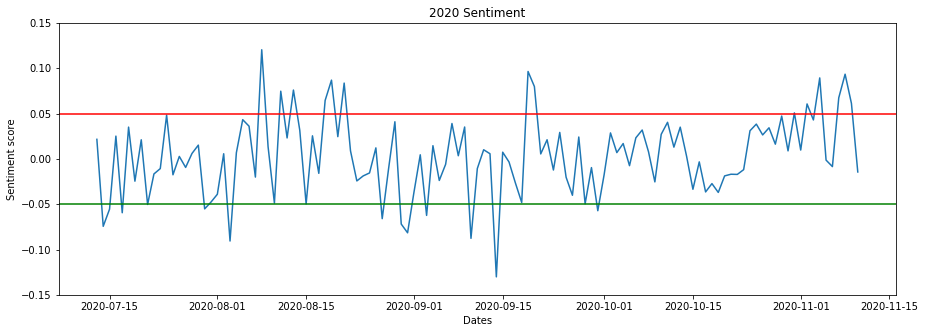

In [266]:
fig, axs = plt.subplots(figsize = (15, 5))
x = dt_2020[104:225]
y = st_2020[104:225]

plt.plot(x,y)
plt.axhline(y=0.05, color='r', linestyle='-')
plt.axhline(y=-0.05, color='g', linestyle='-')
plt.title('2020 Sentiment')
plt.xlabel('Dates')
plt.ylabel('Sentiment score')
plt.ylim([-0.15, 0.15])
plt.show()

In [238]:
pos, neg = [], []
for i in range(len(st_2020[104:225])):
    if st_2020[104:225][i] > 0.05:
        pos.append(i)
    if st_2020[104:225][i] < -0.05:
        neg.append(i)

In [240]:
for i in pos:
    print(dt_2020[104:225][i])
    print(dates[dt_2020[104:225][i]])
    print('')

2020-08-08 00:00:00
['President @realDonaldTrump gives an update on payroll tax, enhanced unemployment benefits, student loan payments, and the eviction moratorium: https://t.co/5tOLVioJBw', 'I can’t believe I have to say this, but we can’t let Donald Trump open up the Grand Canyon for uranium mining.', 'THIS. IS. LEADERSHIP.\n@realDonaldTrump just announced that he’s going to sign an upcoming Executive Order to cover pre-existing conditions.', 'It’s time for @realDonaldTrump to produce his birth certificate and prove he wasn’t born in Russia.', 'These last few months free of payments have made it clear that keeping $500+ a month more from my paycheck would change my life in so many ways. https://t.co/F8E8LeGMaH', 'John Lewis will be remembered as a moral giant who dedicated his life to creating a more just, equal, and moral America.\n\nDonald Trump will not. https://t.co/vfZFeCUX3S', 'Reminder: Trump is actively trying to overturn Obamacare during a global pandemic. His executive orde

In [241]:
for i in neg:
    print(dt_2020[104:225][i])
    print(dates[dt_2020[104:225][i]])
    print('')

2020-07-14 00:00:00
['@realDonaldTrump How about DUMB &amp; DUMBER, assclown?\n\nOr just say #ByeDonJr.\nhttps://t.co/460OLnpQcQ', 'What you have done for HKers🇭🇰 so far are highly appreciated🙏\nThank you so much, President Donald Trump🇺🇸 https://t.co/IwIdnARvg6', 'Trump is only separator between Democrats, anarchy: Rep. Vernon Jones https://t.co/ryaZW0p8n6', "This is a sad day for Hong Kong, but President @realDonaldTrump will not hesitate to do what is right.\n \nToday's strong actions demonstrate that the U.S. will NOT give China a pass – we stand with the people of Hong Kong!", 'When the story broke about Russia offering bounties for the killing of American troops, any Commander in Chief with a shred of decency would do something—anything—to let our troops know they are protected.\n\n17 days later &amp; still nothing from Donald Trump.', '@pantomath__ @realDonaldTrump If you really wanna fire them up... Just post this. 😂😂😂 Seriously, it really gets them going!! https://t.co/z4RZwsm

# 2016 Sentiment

In [150]:
with open('og_2016.jsonl', 'r') as json_file:
    json_list = list(json_file)

t_2016 = []
for json_str in json_list:
    t_2016.append(json.loads(json_str))

In [152]:
dates_2016 = {}
for i in t_2016:
    dt = re.match('^[A-Za-z ]+[0-9]+', i['created_at']).group()
    dt = datetime.datetime.strptime(dt[4:] + ' 2016', '%b %d %Y')
    if dt not in dates_2016.keys():
        temp = []
        temp.append(i['full_text'])
        dates_2016[dt] = temp
    else:
        dates_2016[dt].append(i['full_text'])

In [154]:
cleaned_2016 = {}
sent_2016 = {}
for i in list(dates_2016.keys()):
    clean = [data_utils.clean_text(doc) for doc in dates_2016[i]]
    cleaned_2016[i] = clean
    sent = data_utils.compute_sentiment_scores(clean)
    sent_2016[i] = sent.sentiment_score.mean()

In [155]:
dt_2016, st_2016 = [], []
for i in sorted(sent_2016.items()):
    dt_2016.append(i[0])
    st_2016.append(i[1])

In [162]:
dt_2016[91:211]

[datetime.datetime(2016, 7, 13, 0, 0),
 datetime.datetime(2016, 7, 14, 0, 0),
 datetime.datetime(2016, 7, 15, 0, 0),
 datetime.datetime(2016, 7, 16, 0, 0),
 datetime.datetime(2016, 7, 17, 0, 0),
 datetime.datetime(2016, 7, 18, 0, 0),
 datetime.datetime(2016, 7, 19, 0, 0),
 datetime.datetime(2016, 7, 20, 0, 0),
 datetime.datetime(2016, 7, 21, 0, 0),
 datetime.datetime(2016, 7, 22, 0, 0),
 datetime.datetime(2016, 7, 23, 0, 0),
 datetime.datetime(2016, 7, 24, 0, 0),
 datetime.datetime(2016, 7, 25, 0, 0),
 datetime.datetime(2016, 7, 26, 0, 0),
 datetime.datetime(2016, 7, 27, 0, 0),
 datetime.datetime(2016, 7, 28, 0, 0),
 datetime.datetime(2016, 7, 29, 0, 0),
 datetime.datetime(2016, 7, 30, 0, 0),
 datetime.datetime(2016, 7, 31, 0, 0),
 datetime.datetime(2016, 8, 1, 0, 0),
 datetime.datetime(2016, 8, 2, 0, 0),
 datetime.datetime(2016, 8, 3, 0, 0),
 datetime.datetime(2016, 8, 4, 0, 0),
 datetime.datetime(2016, 8, 5, 0, 0),
 datetime.datetime(2016, 8, 6, 0, 0),
 datetime.datetime(2016, 8, 7, 

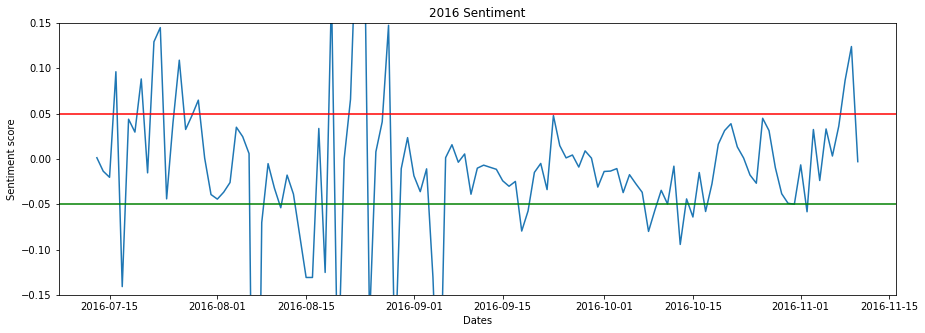

In [205]:
fig, axs = plt.subplots(figsize = (15, 5))
x = dt_2016[91:211]
y = st_2016[91:211]

plt.plot(x,y)
plt.axhline(y=0.05, color='r', linestyle='-')
plt.axhline(y=-0.05, color='g', linestyle='-')
plt.title('2016 Sentiment')
plt.xlabel('Dates')
plt.ylabel('Sentiment score')
plt.ylim([-0.15, 0.15])
plt.show()

In [164]:
pos, neg = [], []
for i in range(len(st_2016[104:225])):
    if st_2016[104:225][i] > 0.05:
        pos.append(i)
    if st_2016[104:225][i] < -0.05:
        neg.append(i)

In [232]:
pos

[0, 3, 23, 26, 27, 28, 32, 104, 105, 107, 112, 113, 114, 115, 116, 118, 119]

In [234]:
for i in pos:
    print(dt_2016[91:211][i])
    print(dates_2016[dt_2016[91:211][i]])
    print('')

2016-07-13 00:00:00
["At the risk of repeating myself, remember always that it is in the media's interest to have a close election to pump ratings.", 'We need to take a hard look at our laws and our attitudes. We need to embrace policies that promote justice for all people.', '@HillaryClinton go to jail !', '"The words Lincoln spoke all those years ago hold resonance for us now...he said: \'A house divided against itself cannot stand.\'" —Hillary', "In times like these, we need a president who can help pull us\ntogether, not split us apart.\n\nAnd that's why Donald Trump is so dangerous.", 'One hashtag has been uniting people who say #ImWithHer and #FeelTheBern since December: https://t.co/bBrqPjqFMx', '@realDonaldTrump pick newt for Vice President pence is not going to help you please pick newt', '@realDonaldTrump Justice Ginsburgs mind is intact when she knows what trump is trump is the one that disgrace to the world.', '@HillaryClinton @BernieSanders Alert: to all Bernie contributor

In [235]:
for i in neg:
    print(dt_2016[91:211][i])
    print(dates_2016[dt_2016[91:211][i]])
    print('')

2016-07-25 00:00:00
["I went to a private Hillary fundraiser headlined by neocon Robert Kagan. He laid out Clinton's foreign policy vision https://t.co/6n3IgWOLU0", ".@deneenborelli says Trump's call for law and order isn't 'dark' – it's NECESSARY\nhttps://t.co/E5WPPG8W03", 'Hilary Clinton https://t.co/mQOO9OizvM', 'I hear you, Sanders supporters who plan to vote Trump. One time I asked for Coke but they only had Pepsi, so I set fire to my head.', 'Top Trump surrogate retired Lt. Gen. Michael Flynn busted for RTing anti-Semitic message. These are BAD people. https://t.co/SX58C8lHWm', 'Idiot #Trump supporters think that the stupid #TrumpWall idea is actually a real thing. https://t.co/fNLnGXT90V', 'Si vas a jalear a Hillary Clinton no estás en mi trinchera, y antes de que saltéis os digo que odio a Trump con todas mis fuerzas.', 'I hear you, Sanders supporters who plan to vote Trump. One time I asked for Coke but they only had Pepsi, so I set fire to my head.', 'I hear you, Sanders supp

In [193]:
dt_2016[91:211][25]

datetime.datetime(2016, 8, 7, 0, 0)

In [192]:
st_2016[91:211][25]

-0.6486

In [ ]:
for i in 

In [194]:
cleaned_2016[datetime.datetime(2016, 8, 7, 0, 0)]

[['leaked',
  'footage',
  'dnc',
  'engineers',
  'programmed',
  'hillbot',
  'withstand',
  'beating',
  'preparation',
  'trump',
  'debate']]

In [195]:
sent_2016

{datetime.datetime(2016, 8, 24, 0, 0): 0.35228181818181814,
 datetime.datetime(2016, 9, 27, 0, 0): -0.008990336658354107,
 datetime.datetime(2016, 9, 29, 0, 0): 0.0008496103896103937,
 datetime.datetime(2016, 10, 2, 0, 0): -0.013440754257907542,
 datetime.datetime(2016, 10, 3, 0, 0): -0.010695171537484114,
 datetime.datetime(2016, 10, 4, 0, 0): -0.037189110225763614,
 datetime.datetime(2016, 10, 5, 0, 0): -0.01743246073298429,
 datetime.datetime(2016, 10, 6, 0, 0): -0.027444264705882324,
 datetime.datetime(2016, 10, 7, 0, 0): -0.03687677902621723,
 datetime.datetime(2016, 10, 8, 0, 0): -0.08003621545003539,
 datetime.datetime(2016, 10, 9, 0, 0): -0.05664304245283017,
 datetime.datetime(2016, 10, 10, 0, 0): -0.03468594936708863,
 datetime.datetime(2016, 10, 11, 0, 0): -0.04976305792972458,
 datetime.datetime(2016, 10, 12, 0, 0): -0.00802867853795689,
 datetime.datetime(2016, 10, 13, 0, 0): -0.09441926940639281,
 datetime.datetime(2016, 10, 14, 0, 0): -0.044167495559502605,
 datetime.dat

In [196]:
dates_2016[datetime.datetime(2016, 8, 7, 0, 0)]

['LEAKED FOOTAGE: DNC engineers have programmed Hillbot 5000 to withstand a beating in preparation for Trump debate. https://t.co/sl56mvDA3F']

# Wordclouds

In [206]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [218]:
# Concact all 2016's tweets to one string
str_2016 = ''
for dt in list(cleaned_2016.values())[91:211]:
    for tw in dt:
        for wd in tw:
            str_2016 += wd
            str_2016 += ' '
str_2016 = str_2016.rstrip()

In [224]:
# Concact all 2020's tweets to one string
str_2020 = ''
for dt in list(cleaned_2020.values())[104:225]:
    for tw in dt:
        for wd in tw:
            str_2020 += wd
            str_2020 += ' '
str_2020 = str_2020.rstrip()

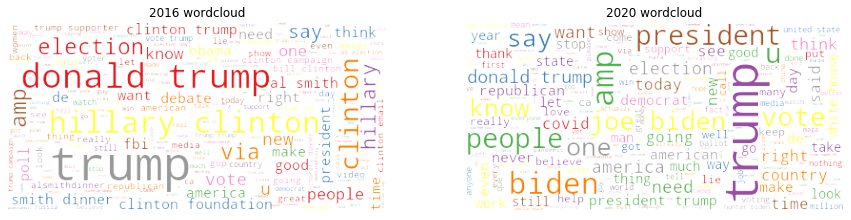

In [229]:
fig, axs = plt.subplots(1, 2, figsize = (15,5))
wordcloud_16 = WordCloud(max_font_size=50, colormap='Set1', background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(str_2016)
wordcloud_20 = WordCloud(max_font_size=50, colormap='Set1', background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(str_2020)
axs[0].imshow(wordcloud_16, interpolation="bilinear")
axs[0].axis('off')
axs[0].set_title('2016 wordcloud')
axs[1].imshow(wordcloud_20, interpolation="bilinear")
axs[1].axis('off')
axs[1].set_title('2020 wordcloud')
plt.show()

# Overall Sentiment

In [246]:
cleaned_lst_2020 = list(cleaned_2020.values())

In [247]:
flat_list_2020 = [item for sublist in cleaned_lst_2020 for item in sublist]

In [249]:
sent_scores_2020 = data_utils.compute_sentiment_scores(flat_list_2020)

In [250]:
sent_scores_2020.groupby('sentiment_type').count()

text_list  text_string  sentiment_components  sentiment_score
sentiment_type                                                               
Negative            29757        29757                 29757            29757
Neutral             25446        25446                 25446            25446
Positive            30973        30973                 30973            30973

In [251]:
cleaned_lst_2016 = list(cleaned_2016.values())
flat_list_2016 = [item for sublist in cleaned_lst_2016 for item in sublist]
sent_scores_2016 = data_utils.compute_sentiment_scores(flat_list_2016)
sent_scores_2016.groupby('sentiment_type').count()

text_list  text_string  sentiment_components  sentiment_score
sentiment_type                                                               
Negative            27377        27377                 27377            27377
Neutral             28039        28039                 28039            28039
Positive            28164        28164                 28164            28164

In [253]:
scores_2016 = sent_scores_2016[sent_scores_2016.sentiment_score != 0]
scores_2020 = sent_scores_2020[sent_scores_2020.sentiment_score != 0]

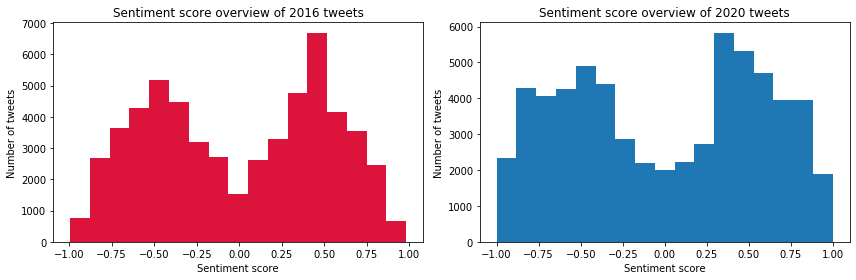

In [265]:
fig, axs = plt.subplots(1, 2, figsize = (12,4), tight_layout=True)
axs[0].hist(scores_2016.sentiment_score, bins = 17, color='crimson')
axs[0].set_title('Sentiment score overview of 2016 tweets')
axs[0].set_xlabel('Sentiment score')
axs[0].set_ylabel('Number of tweets')
axs[1].hist(scores_2020.sentiment_score, bins = 17)
axs[1].set_title('Sentiment score overview of 2020 tweets')
axs[1].set_xlabel('Sentiment score')
axs[1].set_ylabel('Number of tweets')
plt.show()